In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing

In [2]:
path_Yield = "C:/Users/amogh/Desktop/SBMP/6th sem/Final Year Project/Dataset/Crops/finaldata.csv"
path_Soil = "C:/Users/amogh/Desktop/SBMP/6th sem/Final Year Project/Dataset/Soil/Maharashtra Soil.csv"

df_Yield = pd.read_csv(path_Yield)
df_Soil = pd.read_csv(path_Soil)

df_Yield["District_Name"] = df_Yield["District_Name"].str.capitalize()
df_Yield["Season"] = df_Yield["Season"].str.capitalize()
list1 = ["Castor seed", "Other Kharif pulses", "Linseed", "Other  Rabi pulses", "Small millets"]

filter_A = df_Yield["District_Name"] != "Ahmednagar"
df_Yield.where(filter_A, inplace=True)
for i in list1:
    df_Yield.where(df_Yield["Crop"] != i, inplace=True)
df_Yield = df_Yield.dropna()

df_Yield["Crop"].replace(['Arhar/Tur', 'Bajra', 'Gram', 'Jowar', 'Maize', 'Sugarcane',
       'Urad', 'Wheat', 'Cotton(lint)', 'Groundnut', 'Moong(Green Gram)',
       'Sesamum', 'Soyabean', 'Sunflower', 'Safflower',
       'Rapeseed &Mustard', 'Rice', 'Niger seed', 'Ragi'], ['Arhar', 'Bajra', 'Gram', 'Jowar', 'Maize', 'Sugarcane',
       'Urad', 'Wheat', 'Cotton', 'Groundnut', 'Moong',
       'Sesamum', 'Soyabean', 'Sunflower', 'Safflower',
       'Mustard', 'Rice', 'Nigerseed', 'Ragi'], inplace=True)

df_Yield.rename(columns={"District_Name": "District"}, inplace=True)
df_Yield = pd.merge(df_Yield, df_Soil, on="District")

In [3]:
df_Yield

,Index,SRatnagate_Name,District,Crop_Year,Season,Crop,Area,Production,Yield,pH,N,P,K,OC,Fe
0,455.0,Maharashtra,Akola,1997.0,Kharif,Arhar,81200.0,64400.0,0.793103,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
1,456.0,Maharashtra,Akola,1998.0,Kharif,Arhar,77300.0,88300.0,1.142303,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
2,457.0,Maharashtra,Akola,1999.0,Kharif,Arhar,46000.0,58000.0,1.260870,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
3,458.0,Maharashtra,Akola,2000.0,Kharif,Arhar,46400.0,33100.0,0.713362,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
4,459.0,Maharashtra,Akola,2001.0,Kharif,Arhar,46800.0,41600.0,0.888889,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
5,460.0,Maharashtra,Akola,2002.0,Kharif,Arhar,46500.0,42100.0,0.905376,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
6,461.0,Maharashtra,Akola,2003.0,Kharif,Arhar,51000.0,43500.0,0.852941,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
7,462.0,Maharashtra,Akola,2004.0,Kharif,Arhar,52200.0,27500.0,0.526820,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
8,463.0,Maharashtra,Akola,2005.0,Kharif,Arhar,56500.0,41000.0,0.725664,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927
9,464.0,Maharashtra,Akola,2006.0,Kharif,Arhar,54600.0,51300.0,0.939560,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927


In [4]:
path_Costs = "C:/Users/amogh/Desktop/SBMP/6th sem/Final Year Project/Dataset/Crops/Final Costs.csv"

df_FinCost = pd.read_csv(path_Costs)
df_Yield = pd.merge(df_Yield, df_FinCost, how='left', left_on=["Crop","Crop_Year"], right_on=["Crop", "Year"])

df_Yield.loc[df_Yield.Crop == 'Sugarcane', 'MSP'] = (df_Yield["Yield"]  * df_Yield["MSP"]) + (df_Yield["MSP"] * 20)
df_Yield.loc[df_Yield.Crop != 'Sugarcane', 'MSP'] = (df_Yield["Yield"]  * df_Yield["MSP"]) + (df_Yield["MSP"] * 1.5)


In [5]:
df_FinCost

,Crop,Year,MSP,Cultivation Cost
0,Arhar,1997,9450.0,9707.53
1,Bajra,1997,3800.0,6016.75
2,Cotton,1997,14000.0,14805.35
3,Gram,1997,8100.0,8604.38
4,Groundnut,1997,9900.0,12560.54
5,Jowar,1997,3800.0,8362.54
6,Maize,1997,3800.0,10994.72
7,Moong,1997,9450.0,5892.4
8,Mustard,1997,9500.0,12793.91
9,Nigerseed,1997,8350.0,4609.36


In [6]:
df_Yield

,Index,SRatnagate_Name,District,Crop_Year,Season,Crop,Area,Production,Yield,pH,N,P,K,OC,Fe,Year,MSP,Cultivation Cost
0,455.0,Maharashtra,Akola,1997.0,Kharif,Arhar,81200.0,64400.0,0.793103,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,1997,21669.827586,9707.53
1,456.0,Maharashtra,Akola,1998.0,Kharif,Arhar,77300.0,88300.0,1.142303,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,1998,25366.106080,10103.23
2,457.0,Maharashtra,Akola,1999.0,Kharif,Arhar,46000.0,58000.0,1.260870,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,1999,30507.608696,10621.43
3,458.0,Maharashtra,Akola,2000.0,Kharif,Arhar,46400.0,33100.0,0.713362,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2000,26560.344828,11234.54
4,459.0,Maharashtra,Akola,2001.0,Kharif,Arhar,46800.0,41600.0,0.888889,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2001,31533.333333,12432.34
5,460.0,Maharashtra,Akola,2002.0,Kharif,Arhar,46500.0,42100.0,0.905376,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2002,31871.236559,15784.34
6,461.0,Maharashtra,Akola,2003.0,Kharif,Arhar,51000.0,43500.0,0.852941,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2003,32000.000000,13542.45
7,462.0,Maharashtra,Akola,2004.0,Kharif,Arhar,52200.0,27500.0,0.526820,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2004,28172.796935,14744.29
8,463.0,Maharashtra,Akola,2005.0,Kharif,Arhar,56500.0,41000.0,0.725664,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2005,31159.292035,18460.07
9,464.0,Maharashtra,Akola,2006.0,Kharif,Arhar,54600.0,51300.0,0.939560,7.841472,281.022338,22.881925,565.603806,0.492660,3.989927,2006,34397.802198,19385.68


In [7]:
path_Weather = "C:/Users/amogh/Desktop/SBMP/6th sem/Final Year Project/Dataset/Weather/final_weather.csv"

df_Weather = pd.read_csv(path_Weather)
df_Weather["District"].replace(['Akola', 'Amravati', 'Aurangabad', 'Bhandara', 'Bid', 'Buldana',
       'Chandrapur', 'Dhule', 'Gadchiroli', 'Gondiya', 'Hingoli',
       'Jalgaon', 'Jalna', 'Kohlapur', 'Latur', 'Nagpur', 'Nanded',
       'Nandurbar', 'Nashik', 'Osmanabad', 'Parbhani', 'Pune', 'Raigad',
       'Ratnagiri', 'Sangli', 'Satara', 'Sindhudurg', 'Solapur', 'Thane',
       'Wardha', 'Washim', 'Yatavmal'], ['Akola', 'Amravati', 'Aurangabad', 'Bhandara', 'Beed', 'Buldhana',
       'Chandrapur', 'Dhule', 'Gadchiroli', 'Gondia', 'Hingoli',
       'Jalgaon', 'Jalna', 'Kolhapur', 'Latur', 'Nagpur', 'Nanded',
       'Nandurbar', 'Nashik', 'Osmanabad', 'Parbhani', 'Pune', 'Raigad',
       'Ratnagiri', 'Sangli', 'Satara', 'Sindhudurg', 'Solapur', 'Thane',
       'Wardha', 'Washim', 'Yavatmal'], inplace=True)

df_Weather["Season"].replace(['Kharif', 'Rabi', 'Whole Year'], ['Kharif', 'Rabi', 'Whole year'], inplace=True)
df_Yield = pd.merge(df_Yield, df_Weather, how="left", left_on=["Crop_Year", "Season", "District"], right_on=["Year","Season","District"])

In [8]:
df_Weather

,Year,Season,District,Rainfall,Temperature,Humidity
0,1997.0,Kharif,Akola,549.749,26.698000,71.080104
1,1997.0,Kharif,Amravati,581.862,27.375000,68.372741
2,1997.0,Kharif,Aurangabad,562.507,26.356200,72.570539
3,1997.0,Kharif,Bhandara,877.306,28.475000,66.570189
4,1997.0,Kharif,Beed,561.898,26.796200,69.496098
5,1997.0,Kharif,Buldhana,574.782,26.510400,71.346752
6,1997.0,Kharif,Chandrapur,821.759,28.444800,66.030940
7,1997.0,Kharif,Dhule,1271.991,26.307000,71.195081
8,1997.0,Kharif,Gadchiroli,748.865,29.050000,64.756784
9,1997.0,Kharif,Gondia,895.619,28.479200,67.874358


In [9]:
df_Yield

,Index,SRatnagate_Name,District,Crop_Year,Season,Crop,Area,Production,Yield,pH,...,K,OC,Fe,Year_x,MSP,Cultivation Cost,Year_y,Rainfall,Temperature,Humidity
0,455.0,Maharashtra,Akola,1997.0,Kharif,Arhar,81200.0,64400.0,0.793103,7.841472,...,565.603806,0.492660,3.989927,1997,21669.827586,9707.53,1997.0,549.749,26.698000,71.080104
1,456.0,Maharashtra,Akola,1998.0,Kharif,Arhar,77300.0,88300.0,1.142303,7.841472,...,565.603806,0.492660,3.989927,1998,25366.106080,10103.23,1998.0,790.323,28.243200,63.619125
2,457.0,Maharashtra,Akola,1999.0,Kharif,Arhar,46000.0,58000.0,1.260870,7.841472,...,565.603806,0.492660,3.989927,1999,30507.608696,10621.43,1999.0,923.362,26.634200,70.758609
3,458.0,Maharashtra,Akola,2000.0,Kharif,Arhar,46400.0,33100.0,0.713362,7.841472,...,565.603806,0.492660,3.989927,2000,26560.344828,11234.54,2000.0,510.889,27.616000,65.411274
4,459.0,Maharashtra,Akola,2001.0,Kharif,Arhar,46800.0,41600.0,0.888889,7.841472,...,565.603806,0.492660,3.989927,2001,31533.333333,12432.34,2001.0,395.544,27.252800,66.493610
5,460.0,Maharashtra,Akola,2002.0,Kharif,Arhar,46500.0,42100.0,0.905376,7.841472,...,565.603806,0.492660,3.989927,2002,31871.236559,15784.34,2002.0,685.537,26.840000,71.326885
6,461.0,Maharashtra,Akola,2003.0,Kharif,Arhar,51000.0,43500.0,0.852941,7.841472,...,565.603806,0.492660,3.989927,2003,32000.000000,13542.45,2003.0,973.800,28.093318,58.681108
7,462.0,Maharashtra,Akola,2004.0,Kharif,Arhar,52200.0,27500.0,0.526820,7.841472,...,565.603806,0.492660,3.989927,2004,28172.796935,14744.29,2004.0,700.800,26.498170,77.007731
8,463.0,Maharashtra,Akola,2005.0,Kharif,Arhar,56500.0,41000.0,0.725664,7.841472,...,565.603806,0.492660,3.989927,2005,31159.292035,18460.07,2005.0,1128.800,27.875874,62.991697
9,464.0,Maharashtra,Akola,2006.0,Kharif,Arhar,54600.0,51300.0,0.939560,7.841472,...,565.603806,0.492660,3.989927,2006,34397.802198,19385.68,2006.0,1118.600,26.360209,76.555183


In [10]:
df_Yield.loc[df_Yield['Cultivation Cost'] == "20994,98", 'Cultivation Cost'] = 20994.98
df_Yield = df_Yield.astype({"Cultivation Cost": float})
df_Yield["Min PPH"] = (df_Yield["MSP"] - df_Yield["Cultivation Cost"])
df_Yield["Already Grown"] = np.where((df_Yield['Area']>= 10000.0) & (df_Yield["Yield"]>1.0), 1, 0)

cols_Drop = ["Index", "SRatnagate_Name", "District", "Crop_Year", "Year_x", "Year_y", "MSP", "Cultivation Cost", "Area", "Production", "Yield"]
df_Yield.drop(cols_Drop, axis=1, inplace=True)

df_Yield = df_Yield.sort_values(["Season", "Crop"])
df_Yield = df_Yield.reset_index(drop=True)
df_Yield = df_Yield.round(3)

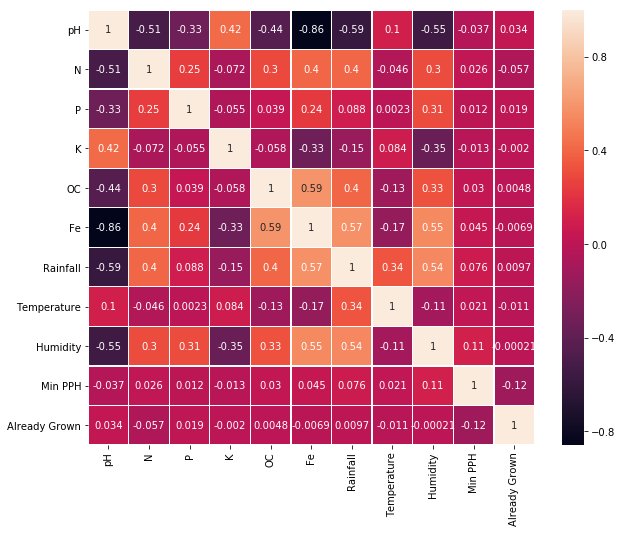

In [11]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_Yield.corr(), annot=True, linewidths=.3)

In [12]:
for col in df_Yield.columns:
    if(df_Yield[col].dtype == np.dtype('object')):
        dummies = pd.get_dummies(df_Yield[col],prefix=col)
        df_Yield = pd.concat([df_Yield,dummies],axis=1)
        
        df_Yield.drop([col], axis = 1 , inplace=True)

In [13]:
#df_Yield.to_csv("C:/Users/amogh/Desktop/SBMP/6th sem/Project/Dataset/Crops/train_data1.csv", index=False)

In [14]:
df_Yield.describe()

,pH,N,P,K,OC,Fe,Rainfall,Temperature,Humidity,Min PPH,...,Crop_Nigerseed,Crop_Ragi,Crop_Rice,Crop_Safflower,Crop_Sesamum,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Urad,Crop_Wheat
count,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,...,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000
mean,7.499429,287.472383,25.139488,455.577850,0.637394,6.392591,774.922632,25.930564,70.517755,11713.277535,...,0.027736,0.018759,0.061926,0.030156,0.056783,0.045991,0.043167,0.086132,0.051841,0.050227
std,0.471060,96.044070,12.492287,82.996113,0.312248,6.042089,728.593270,1.729113,11.949214,18421.081618,...,0.164223,0.135681,0.241034,0.171026,0.231439,0.209476,0.203243,0.280573,0.221716,0.218424
min,5.737000,155.208000,10.111000,287.430000,0.417000,1.914000,3.958000,20.954000,43.803000,-86575.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.427000,231.718000,14.075000,395.941000,0.476000,3.469000,161.907500,24.565000,62.917000,-924.761500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.679000,272.108000,22.634000,457.092000,0.522000,4.636000,721.100000,26.228000,68.837000,12307.314000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.809000,298.268000,31.756000,519.958000,0.602000,6.728000,956.636000,27.253000,77.549500,20327.777000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.004000,752.843000,63.784000,602.551000,1.661000,39.760000,3825.700000,29.541000,107.426000,123099.610000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



 mu = 11713.28 and sigma = 18420.15



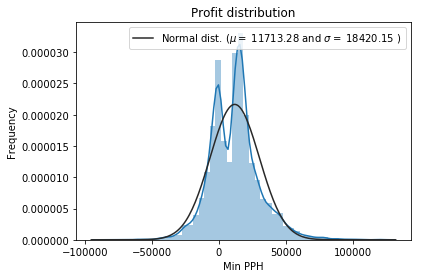

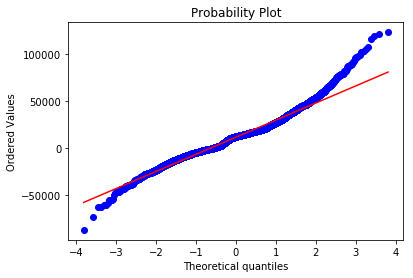

In [15]:
sns.distplot(df_Yield['Min PPH'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_Yield['Min PPH'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Profit distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_Yield['Min PPH'], plot=plt)
plt.show()